### 4c)

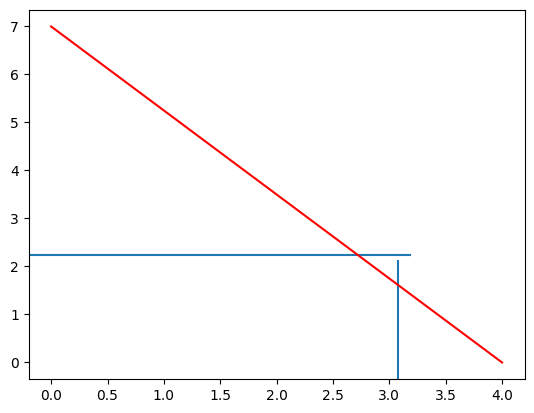

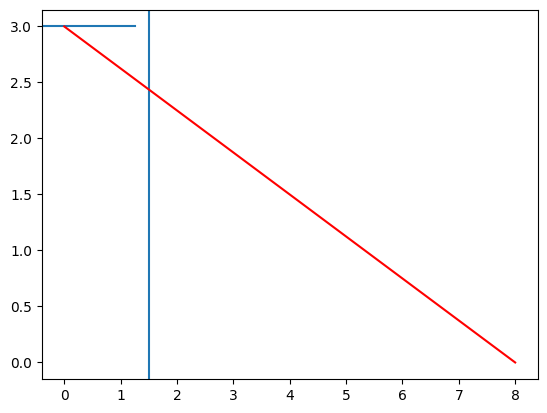

In [31]:
from random import randint
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def target_function(input, h, d):
        w_x, h_x = input

        return -w_x*h_x * (1 - (d * h_x**2) / (2 * h**2))


def gable_window_optimization(w, h, d, p, C):
    h_start = randint(0, h)
    w_start = randint(0, w)
    bounds=[(0, h), (0, w)]
    
    

    def w_constraint(x):
         return w - x[0]
    
    def h_max_constraint(x):
         return h - h*x[0]/w - x[1]
    
    def h_dark_constraint(x):
         return h/d - x[1]
    
    constraints = [{"type": "ineq", "fun": w_constraint},
                   {"type": "ineq", "fun": h_max_constraint},
                   {"type": "ineq", "fun": h_dark_constraint},]

    if C < p:
        def c_constraint(x):
          return C - x[0]*x[1]
        constraints.append({"type": "ineq", "fun": c_constraint})

    result = minimize(fun=target_function, x0=(w_start, h_start), method="SLSQP", constraints=constraints, args=(h, d), bounds=bounds)
    
    x_values = np.linspace(0, w, 100)
    y_values = h - h*x_values/w

    h_x, w_x = result.x
    plt.axhline(h_x, xmax=(w_x)/w)
    plt.axvline(w_x, ymax=(h_x)/h)
    plt.plot(x_values, y_values, c="red")
    plt.show()
    
gable_window_optimization(4, 7, 1, 70, 100)
gable_window_optimization(8, 3, 2, 100, 70)